In [1]:
# import modules

import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# model definition

class _x_to_y(tf.keras.Model):
    def __init__(self, ns=[16,16]):
        super(_x_to_y, self).__init__()
        self.ls = [
            tf.keras.layers.Dense(n, 'softplus',  \
                ) \
            for n in ns]
        self.ls += [tf.keras.layers.Dense(1)]
            
    def __call__(self, x):     
        for l in self.ls:
            x = l(x)
        return x

def main(**kwargs):
    xs = tf.keras.Input(shape=[1])
    ys = _x_to_y(**kwargs)(xs)
    model = tf.keras.Model(inputs = [xs], outputs = [ys])
    model.compile('adam', 'mse')
    return model

model = main()

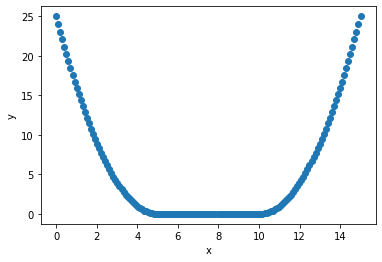

In [3]:
# data generation

xs = np.linspace(-5,5,100)
ys = np.square(xs) 
    
ys1 = ys[0:50]
ys2 = np.zeros([50])
ys3 = ys[50:]
    
    
ys = np.concatenate((ys1, ys2, ys3), axis = 0)
    
xs = tf.constant(np.linspace(0,15,150))
ys = tf.constant(ys)

xs = tf.expand_dims(xs, axis = 1)
ys = tf.expand_dims(ys, axis = 1)

plt.scatter(xs,ys)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Train on 150 samples
Epoch 1/1000
150/150 - 1s - loss: 72.4599
Epoch 2/1000
150/150 - 0s - loss: 69.5617
Epoch 3/1000
150/150 - 0s - loss: 66.9877
Epoch 4/1000
150/150 - 0s - loss: 64.7395
Epoch 5/1000
150/150 - 0s - loss: 62.8999
Epoch 6/1000
150/150 - 0s - loss: 61.2701
Epoch 7/1000
150/150 - 0s - loss: 59.9056
Epoch 8/1000
150/150 - 0s - loss: 58.6460
Epoch 9/1000
150/150 - 0s - loss: 57.8224
Epoch 10/1000
150/150 - 0s - loss: 57.1464
Epoch 11/1000
150/150 - 0s - loss: 56.3788
Epoch 12/1000
150/150 - 0s - loss: 56.1295
Epoch 13/1000
150/150 - 0s - loss: 55.7079
Epoch 14/1000
150/150 - 0s - loss: 55.4237
Epoch 15/1000
150/150 - 0s - loss: 55.2376
Epoch 16/1000
150/150 - 0s - loss: 55.0310
Epoch 17/1000
150/150 - 0s - loss: 54.7884
Epoch 18/1000
150/150 - 0s - loss: 54.5990
Epoch 19/1000
150/150 - 0s - loss: 54.3416
Epoch 20/1000
150/150 - 0s - loss: 54.1081
Epoch 21/1000
150/150 - 0s - loss: 53.8764
Epoch 22/1000
150/150 - 0s - loss: 53.6597
Epoch 23/1000
150/150 - 0s - loss: 53.3876

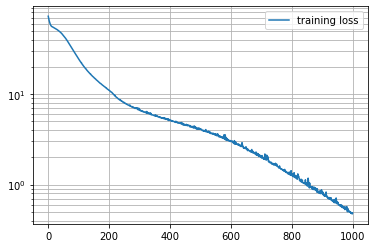

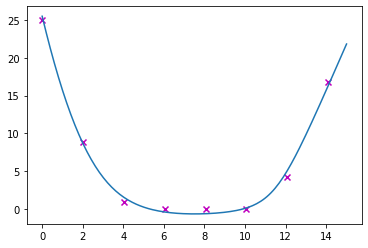

In [4]:
# model calibration

h = model.fit([xs], [ys], epochs = 1000,  verbose = 2)

plt.figure(1)
plt.semilogy(h.history['loss'], label='training loss')
plt.grid(which='both')
plt.legend()

plt.figure(2)
plt.scatter(xs[0::20], ys[0::20], c='m', marker='x')
plt.plot(xs, model.predict(xs))
plt.show()